# Initial Exploration of Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_excel(r'Office Supply Campaign ResultS 7-23-19.xlsx')
 

In [3]:
#Explore the data variables
df.head()

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,6-10,English
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,...,N,N,N,N,N,N,N,Y,1-5,English
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),...,N,N,N,N,N,Y,N,N,,NaN


In [4]:
df['Campaign Period Sales']

0         238.704762
1         281.680000
2         432.857143
3           0.000000
4        1370.166667
            ...     
16168       0.000000
16169       0.000000
16170       0.000000
16171       0.000000
16172            NaN
Name: Campaign Period Sales, Length: 16173, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
Customer Number                      16172 non-null float64
Campaign Period Sales                16172 non-null float64
Historical Sales Volume              16172 non-null float64
Date of First Purchase               16172 non-null datetime64[ns]
Number of Prior Year Transactions    16172 non-null float64
Do Not Direct Mail Solicit           16172 non-null float64
Do Not Email                         16172 non-null float64
Do Not Telemarket                    16172 non-null float64
Repurchase Method                    16172 non-null object
Last Transaction Channel             15730 non-null object
Desk                                 16173 non-null object
Executive Chair                      16171 non-null object
Standard Chair                       16171 non-null object
Monitor                              16171 non-null object
Printer                              16171 non-nul

In [6]:
#Exploring how many null values in dataset
df.isnull().sum()

Customer Number                         1
Campaign Period Sales                   1
Historical Sales Volume                 1
Date of First Purchase                  1
Number of Prior Year Transactions       1
Do Not Direct Mail Solicit              1
Do Not Email                            1
Do Not Telemarket                       1
Repurchase Method                       1
Last Transaction Channel              443
Desk                                    0
Executive Chair                         2
Standard Chair                          2
Monitor                                 2
Printer                                 2
Computer                                1
Insurance                               3
Toner                                   3
Office Supplies                         1
Number of Employees                     3
Language                             4472
dtype: int64

In [ ]:
#Create a Heatmap to see to check null values

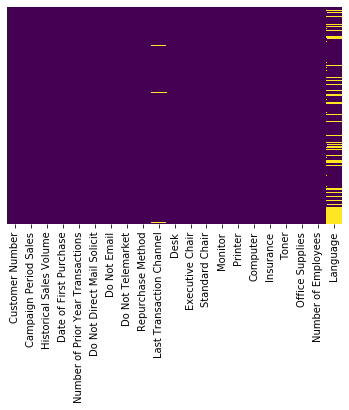

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Last Transaction Channel and Language have a lot of null values

In [8]:
df['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [9]:
# Substituting null values with 'unknown'
df['Last Transaction Channel'].fillna('UNKNOWN', inplace= True)

In [10]:
df['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
UNKNOWN            443
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [14]:
df['Language'].value_counts()

English       11317
Spanish          88
Italian          46
Portuguese       41
Hindi            40
Chinese          34
Russian          24
Hebrew           20
Arabic           18
German           15
Greek            15
Japanese         11
Polish           10
Vietnamese        9
French            6
Korean            4
Thai              2
Pashto            1
Name: Language, dtype: int64

In [15]:
#Replacing all non English language into a common group of 'Non English'
df.loc[(df['Language'].notnull()) & (df['Language'] != 'English'), 'Language']  = 'Non English'

In [16]:
df['Language'].value_counts()

English        11317
Non English      384
Name: Language, dtype: int64

In [17]:
# Replacing all Null values with 'Unknown' instead of throwing away 4.5 K entries
df['Language'].fillna('Unknown', inplace=True)

In [18]:
df['Language'].value_counts()

English        11317
Unknown         4472
Non English      384
Name: Language, dtype: int64

In [19]:
# Check the contents of language variable now
df['Language'].value_counts()

English        11317
Unknown         4472
Non English      384
Name: Language, dtype: int64

In [20]:
df.dropna(inplace= True)

In [21]:
# all data are now non null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 21 columns):
Customer Number                      16168 non-null float64
Campaign Period Sales                16168 non-null float64
Historical Sales Volume              16168 non-null float64
Date of First Purchase               16168 non-null datetime64[ns]
Number of Prior Year Transactions    16168 non-null float64
Do Not Direct Mail Solicit           16168 non-null float64
Do Not Email                         16168 non-null float64
Do Not Telemarket                    16168 non-null float64
Repurchase Method                    16168 non-null object
Last Transaction Channel             16168 non-null object
Desk                                 16168 non-null object
Executive Chair                      16168 non-null object
Standard Chair                       16168 non-null object
Monitor                              16168 non-null object
Printer                              16168 non-nul

In [22]:
df.head(2)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,...,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,...,N,N,N,N,N,N,N,Y,11-50,English


In [24]:
#Converting 'object' datatype values to dummy variables
df_types= df.dtypes== 'object'

In [25]:
print (list(enumerate(df_types)))

[(0, False), (1, False), (2, False), (3, False), (4, False), (5, False), (6, False), (7, False), (8, True), (9, True), (10, True), (11, True), (12, True), (13, True), (14, True), (15, True), (16, True), (17, True), (18, True), (19, True), (20, True)]


In [26]:
# create an empty list and to that append all object type columns
obj_cols=[]
for counter,feature in enumerate(df_types):
    if feature: # if feature is True
        obj_cols.append(df_types.index[counter])

In [27]:
print(obj_cols)

['Repurchase Method', 'Last Transaction Channel', 'Desk', 'Executive Chair', 'Standard Chair', 'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner', 'Office Supplies', 'Number of Employees', 'Language']


In [28]:
# create a data frame with object type columns
obj_df= df.loc[:, obj_cols]

In [29]:
obj_df.head()

,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English
3,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English
4,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,Unknown


In [30]:
obj_df['Number of Employees'].value_counts()

6-10       5230
           3744
1-5        2700
11-50      2236
51-100     1381
101-500     653
500+        224
Name: Number of Employees, dtype: int64

In [31]:
# The missing values are imputed as 'unknown' and others are mapped to ordinal categories
obj_df['Number of Employees']= obj_df['Number of Employees'].map({'1-5': 'small', ' ':'unknown', '6-10':'small','11-50': 'medium','51-100':'Large', '101-500':'Big', '500+': 'Huge'})

In [32]:
obj_df['Number of Employees'].value_counts()

small      7930
unknown    3744
medium     2236
Large      1381
Big         653
Huge        224
Name: Number of Employees, dtype: int64

In [34]:
obj_df['Repurchase Method'].value_counts()

NOTICE          11901
AUTO RENEW       4266
PAYMENT PLAN        1
Name: Repurchase Method, dtype: int64

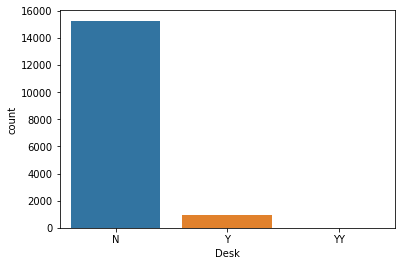

In [35]:
sns.countplot(x='Desk',data=df)

In [36]:
#cols_to_dummy= ['Repurchase Method','Last Transaction Channel']


In [37]:
obj_df['Last Transaction Channel'].value_counts()

MAIL              7769
AUTO RENEW        3140
WEB               2646
PHONE             1096
BRANCH (POS)       633
UNKNOWN            442
BRANCH (PHONE)     411
BILLING             17
IT                  14
Name: Last Transaction Channel, dtype: int64

In [38]:
obj_df.describe()

,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
count,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168
unique,3,9,3,2,2,2,2,3,3,3,2,6,3
top,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,small,English
freq,11901,7769,15257,15011,15887,15870,15742,15938,14237,15110,11801,7930,11315


In [39]:
obj_df['Desk'].value_counts()

N     15257
Y       910
YY        1
Name: Desk, dtype: int64

In [40]:
# Replace the single yy value by y
obj_df['Desk']=obj_df['Desk'].replace({'YY':'Y'})

In [41]:
obj_df['Desk'].value_counts()

N    15257
Y      911
Name: Desk, dtype: int64

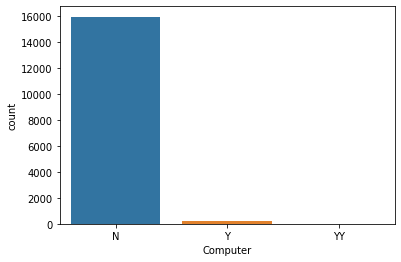

In [42]:
sns.countplot(x='Computer',data=df)

In [43]:
obj_df['Computer'].value_counts()

N     15938
Y       229
YY        1
Name: Computer, dtype: int64

In [44]:
# Replace the single yy value by y
obj_df['Computer']=obj_df['Computer'].replace({'YY':'Y'})

In [45]:
obj_df['Insurance'].value_counts()

N     14237
Y      1930
YY        1
Name: Insurance, dtype: int64

In [46]:
# Replace the single yy value by y
obj_df['Insurance']=obj_df['Insurance'].replace({'YY':'Y'})

In [47]:
obj_df['Toner'].value_counts()

N     15110
Y      1057
YY        1
Name: Toner, dtype: int64

In [48]:
obj_df['Toner']=obj_df['Toner'].replace({'YY':'Y'})

In [49]:
obj_df.describe()

,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
count,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168,16168
unique,3,9,2,2,2,2,2,2,2,2,2,6,3
top,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,small,English
freq,11901,7769,15257,15011,15887,15870,15742,15938,14237,15110,11801,7930,11315


In [50]:
# Create dummy variables of all object type columns and drop first to avoid dummy variable trap
pd.get_dummies(obj_df, drop_first=True).head()


,Repurchase Method_NOTICE,Repurchase Method_PAYMENT PLAN,Last Transaction Channel_BILLING,Last Transaction Channel_BRANCH (PHONE),Last Transaction Channel_BRANCH (POS),Last Transaction Channel_IT,Last Transaction Channel_MAIL,Last Transaction Channel_PHONE,Last Transaction Channel_UNKNOWN,Last Transaction Channel_WEB,...,Insurance_Y,Toner_Y,Office Supplies_Y,Number of Employees_Huge,Number of Employees_Large,Number of Employees_medium,Number of Employees_small,Number of Employees_unknown,Language_Non English,Language_Unknown
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [51]:
obj_dummied = pd.get_dummies(obj_df, drop_first=True)

In [52]:
df.shape

(16168, 21)

In [53]:
obj_dummied.shape

(16168, 26)

In [54]:
# now aggregate non object columns  and create a dataframe for numerical columns
df_types1 = df.dtypes != 'object'

In [55]:
num_cols=[]
for i,feature in enumerate(df_types1):
    if feature:
        num_cols.append(df_types.index[i])

In [56]:
print(num_cols)

['Customer Number', 'Campaign Period Sales', 'Historical Sales Volume', 'Date of First Purchase', 'Number of Prior Year Transactions', 'Do Not Direct Mail Solicit', 'Do Not Email', 'Do Not Telemarket']


In [57]:
#aggregatie dummified object columns with numerical dataframe to form a cleaned dataset
clean_df= pd.concat([df[num_cols], obj_dummied], sort= None, axis=1)

In [58]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16168 entries, 0 to 16171
Data columns (total 34 columns):
Customer Number                            16168 non-null float64
Campaign Period Sales                      16168 non-null float64
Historical Sales Volume                    16168 non-null float64
Date of First Purchase                     16168 non-null datetime64[ns]
Number of Prior Year Transactions          16168 non-null float64
Do Not Direct Mail Solicit                 16168 non-null float64
Do Not Email                               16168 non-null float64
Do Not Telemarket                          16168 non-null float64
Repurchase Method_NOTICE                   16168 non-null uint8
Repurchase Method_PAYMENT PLAN             16168 non-null uint8
Last Transaction Channel_BILLING           16168 non-null uint8
Last Transaction Channel_BRANCH (PHONE)    16168 non-null uint8
Last Transaction Channel_BRANCH (POS)      16168 non-null uint8
Last Transaction Channel_IT         

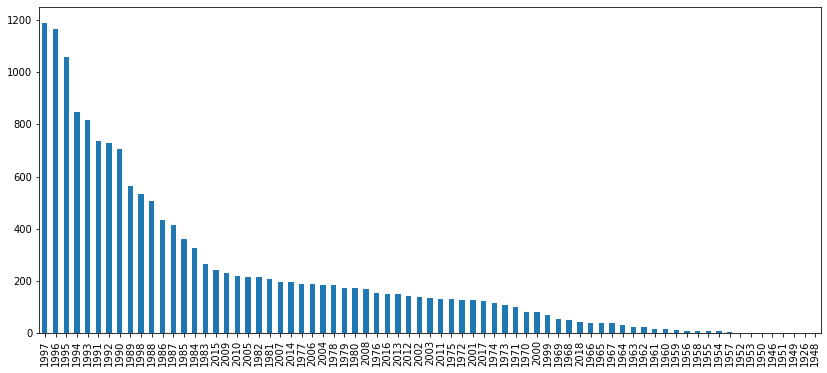

In [59]:
#we can look at the date of first purchase now and re-engineer the feature
import datetime
clean_df['year_of_first_purchase']= clean_df['Date of First Purchase'].dt.year # this puts it in the datetime format for year
clean_df['year_of_first_purchase'].value_counts().plot(kind='bar', figsize =(14,6)) # tells you how many customers in a year

In [60]:

import datetime
now= datetime.datetime.now()

In [61]:
# create a new feature about tenure since customer buying from the store 
clean_df['Years_since_customer']= now.year- clean_df['Date of First Purchase'].dt.year

In [62]:
# Export the cleaned dataset to a csv file
clean_df.to_csv("clean_df.csv",  index=False)